## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import sys
sys.path.append("..")  
import metaprivBIDS_stat as ST
from metaprivBIDS_stat import plot_calc

## File from OpenNeuro Import
BTC is the raw dataset "Brain Tumor Connectomics Data" taken from OpenNeuro. 


In [2]:
BTC = 'https://s3.amazonaws.com/openneuro.org/ds002080/participants.tsv?versionId=LK7PRmZBsdzjwgZPqBKSdCjXdfxw4ory'
BTC = pd.read_csv(BTC, sep='\t')
BTC.to_csv('data_ds002080/btc_dataset_ds002080.csv', sep=',', index=False)

## Load in of results calculated using (MetaprivBIDS App)

The selected quasi identifers are: 
- Education level (1-9)
- age
- height (cm)(pre-op)
- handedness
- Marital status
- Employment
- Sex


The dis-score fraction is the default 0.3 & missing values are indicated as NaN.

In [3]:
suda = pd.read_csv('data_ds002080/suda_ds002080.csv', sep=',')
pif = pd.read_csv('data_ds002080/pif_ds002080.csv', sep=',',index_col='Unnamed: 0').sort_index()
suda_field_score =  pd.read_csv('data_ds002080/att_suda.csv', sep=',').drop(columns=['Unnamed: 0'], errors='ignore')
k_combined_field =  pd.read_csv('data_ds002080/normalized_difference_results.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})
k_combined_all = pd.read_csv('data_ds002080/k-combined-3-7.csv', sep=',')
k_combined_field_non_risk = pd.read_csv('data_ds002080/normalized_difference_results_non.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})

## Using MetaprivBIDS stats import to calculate Pearson and Spearman correlation on row level.


        ROW LEVEL CORRELATION      

Spearman Rank Correlation between suda & pif: nan, P-value: nan
Kendall's Tau between suda & pif: nan, p-value: nan
Pearson Correlation between suda & pif: nan


/Users/emiliekibsgaard/opt/anaconda3/envs/rpy2_env/lib/python3.7/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/emiliekibsgaard/opt/anaconda3/envs/rpy2_env/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/emiliekibsgaard/opt/anaconda3/envs/rpy2_env/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


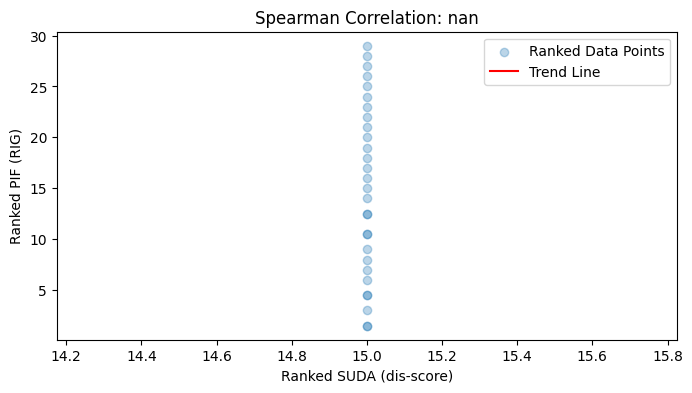

____________________________________________________________________________________

      FIELD LEVEL CORRELATIONS     

Pearson Correlation between SUDA & PIF field level: 0.99
Pearson Correlation between K-combined & PIF field level: 0.12
Pearson Correlation between SUDA & K-combined field level: 0.11


Spearman Rank Correlation between PIF & SUDA: 0.89, P-value: 0.0068
Spearman Rank Correlation between PIF & K: 0.58, P-value: 0.1731
Spearman Rank Correlation between SUDA & K: 0.58, P-value: 0.1731


In [4]:
ST.stats(suda, pif, suda_field_score, k_combined_field)

## Iterating through all possible combination of variables & calculating the correlation between SUDA, K-Global and PIF 

In [5]:
sum_score_df  = ST.calculate_summed_dis_scores(k_combined_all, BTC, sample_fraction=0.3, missing_value= np.nan)

Spearman Correlation between Suda sum and K-combined: 0.75
Pearson Correlation between Suda sum and K-combined: 0.72


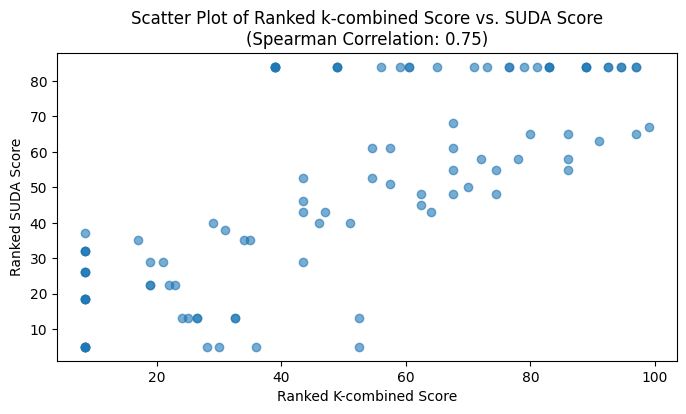

________________________________________________________________________


Spearman Correlation between PIF 95% and K-combined: 0.86
Pearson Correlation between PIF 95% and K-combined: 0.90


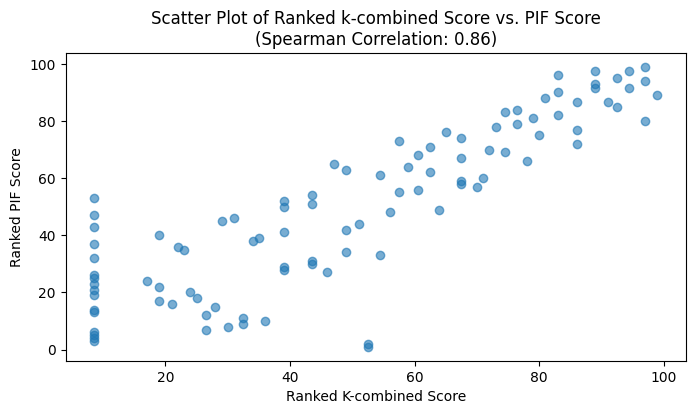

________________________________________________________________________


Spearman Correlation between PIF 95% and SUDA: 0.81
Pearson Correlation between PIF 95% and SUDA: 0.79


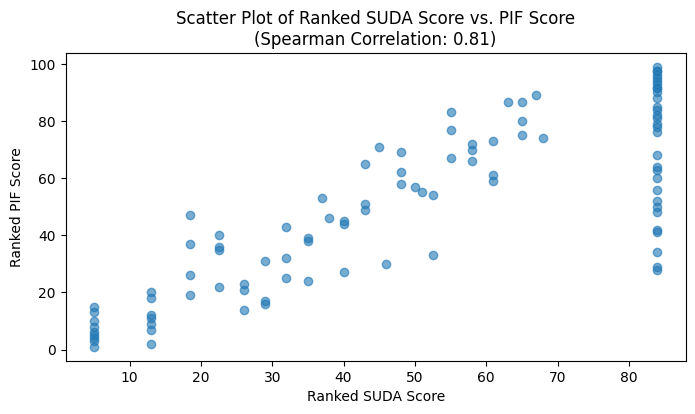

In [6]:
plot_calc(sum_score_df)

# T-test between risky and non-risky k-global values for variables. 


### Non risk variables


In [15]:
k_combined_field_non_risk

,variable,Normalized Difference
0,ERQ reappraisal,0.0
1,MOT_latency_mean,0.0
2,MOT_error_mean,0.0
3,RTI_simpleRT_sd,0.0
4,RTI_simpleMT_mean,0.0
5,RTI_simpleMT_sd,0.0
6,RTI_fiveMT,0.0
7,RTI_fiveRT,0.0
8,RTI_fiveRT_sd,0.0
9,RTI_fiveMT_mean,0.0


### Risk Variables 

In [16]:
k_combined_field

,variable,Normalized Difference
0,Education level (1-9),0.4
1,age,0.1
2,height (cm)(pre-op),0.0
3,handedness,0.0
4,Marital status,0.0
5,Employment,0.0
6,sex,0.0


## Result of Paired T-test


In [17]:
mean_risk_values = (k_combined_field['Normalized Difference']).mean()
print('Mean, risk identifiers:',mean_risk_values)
mean_risk_values = (k_combined_field_non_risk['Normalized Difference']).mean()
print('Mean, non-risk identifiers:',mean_risk_values)

Mean, risk identifiers: 0.07142857142857142
Mean, non-risk identifiers: 0.0


In [20]:
t, p = stats.ttest_ind(k_combined_field['Normalized Difference'], k_combined_field_non_risk['Normalized Difference'])
print('t:',t,'p-value:', p)

t: 3.353091214466485 p-value: 0.001547703229896185


### PIF & SUDA Outliers 

In [24]:
class_outliers, madn, mad, outlier_indices, above_outlier_indices = ST.rst_outlier_case2(suda, 'dis-score')
print(len(above_outlier_indices))
class_outliers, madn, mad, outlier_indices, above_outlier_indices = ST.rst_outlier_case2(pif, 'RIG')
print(len(above_outlier_indices))

0
0
